<a href="https://colab.research.google.com/github/manikanta0403/Main-flow-Internship/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load the provided CSV file
file_path = 'disney_plus_titles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


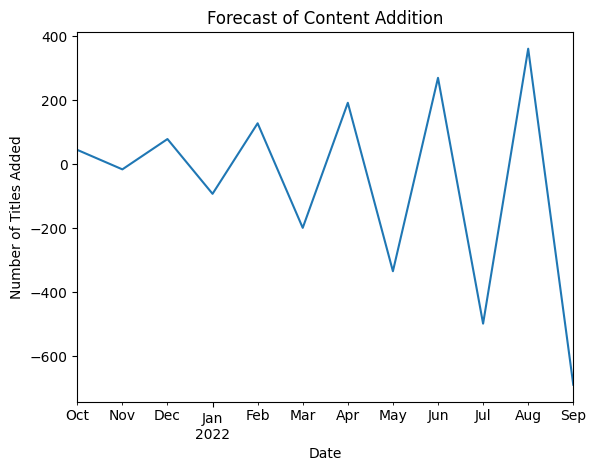

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Preprocess date column
df['date_added'] = pd.to_datetime(df['date_added'])

# Aggregate data by month
monthly_data = df.groupby(df['date_added'].dt.to_period('M')).size()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(5,1,0))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
forecast.plot()
plt.title('Forecast of Content Addition')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.show()


In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Perform sentiment analysis on the description column
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display sentiment distribution
print(df[['title', 'description', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                            title  \
0                   A Spark Story   
1                  Spooky Buddies   
2          The Fault in Our Stars   
3                 Dog: Impossible   
4  Spidey And His Amazing Friends   

                                         description  sentiment  
0  Two Pixar filmmakers strive to bring their uni...     0.2263  
1  The puppies go on a spooky adventure through a...    -0.2023  
2  Hazel and Gus share a love that sweeps them on...     0.7506  
3  Matt Beisner uses unique approaches to modifyi...     0.0000  
4  Spidey teams up with pals to become The Spidey...     0.0000  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


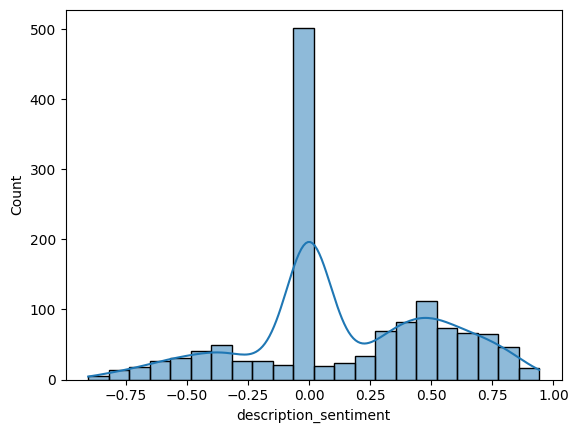

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import seaborn as sns
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on descriptions
df['description_sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display sentiment distribution
sns.histplot(df['description_sentiment'], kde=True)
plt.show()


<ipython-input-8-e5395910b30b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['duration'] = features['duration'].str.extract('(\d+)').astype(float) # Extract numerical part and cast to float
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


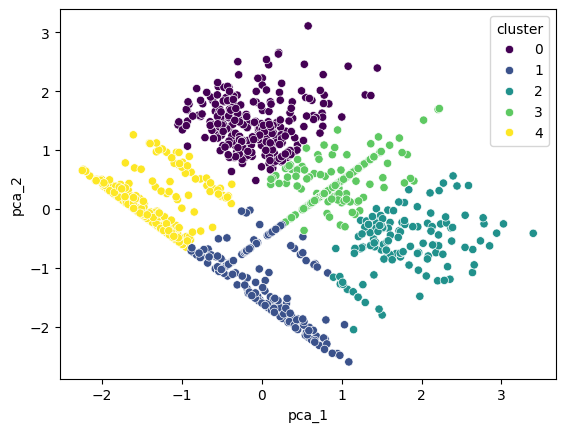

In [8]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant features for clustering
features = df[['duration', 'description_sentiment']]  # Add more relevant features

# Extract numerical values from 'duration' column
features['duration'] = features['duration'].str.extract('(\d+)').astype(float) # Extract numerical part and cast to float

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters using PCA
pca = PCA(2)
principal_components = pca.fit_transform(scaled_features)
df['pca_1'] = principal_components[:, 0]
df['pca_2'] = principal_components[:, 1]

sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=df, palette='viridis')
plt.show()
